In [1]:
# import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# location of the CSV file
womens_csv = "../Project1/Resources/2018_Womens_Shoes.csv"
mens_csv = "../Project1/Resources/mens_shoe_prices.csv"
spring19_womens_csv = "../Project1/Resources/Spring19_women.csv"

In [4]:
# open the CSV and see a preview
shoes_df = pd.read_csv(womens_csv)
shoes_df.head()

,id,Date_Added,date_updated,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.dateAdded,prices.dateSeen,prices.isSale,prices.size,Merchant,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2018-01-10T19:30:29Z,"2018-01-09T13:35:00.000Z,2018-01-05T13:09:00.0...",False,9.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
1,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,5.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
2,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,9 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
3,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,7.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
4,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2018-02-11T05:04:36Z,"2018-01-16T16:06:00.000Z,2018-01-14T08:55:00.000Z",False,9 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN


In [5]:
mens_shoes_df = pd.read_csv(mens_csv, error_bad_lines=False)
mens_shoes_df.head()

,id,asins,brand,categories,colors,count,Date_Added,dateAdded,Date_Updated,dateUpdated,...,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 50
0,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,6/14/16,2016-06-14T04:29:57Z,7/9/16,2016-07-09T20:26:48Z,...,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN
1,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,6/14/16,2016-06-14T04:29:57Z,7/9/16,2016-07-09T20:26:48Z,...,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,6/14/16,2016-06-14T04:29:57Z,7/9/16,2016-07-09T20:26:48Z,...,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,6/14/16,2016-06-14T04:29:57Z,7/9/16,2016-07-09T20:26:48Z,...,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,6/14/16,2016-06-14T04:29:57Z,7/9/16,2016-07-09T20:26:48Z,...,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN


In [6]:
spring19_df = pd.read_csv(spring19_womens_csv)
#spring19_df.head()

In [7]:
#spring19_df.info()

In [8]:
# info on the csv file (see where data is missing, data types)
#shoes_df.info()

In [9]:
mens_shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12207 entries, 0 to 12206
Data columns (total 51 columns):
id                     12207 non-null object
asins                  898 non-null object
brand                  11989 non-null object
categories             12207 non-null object
colors                 8096 non-null object
count                  0 non-null float64
Date_Added             12207 non-null object
dateAdded              12207 non-null object
Date_Updated           12207 non-null object
dateUpdated            12207 non-null object
descriptions           8402 non-null object
dimension              258 non-null object
ean                    7815 non-null float64
features               10184 non-null object
flavors                0 non-null float64
imageURLs              11697 non-null object
isbn                   0 non-null float64
keys                   12207 non-null object
manufacturer           5979 non-null object
manufacturerNumber     9290 non-null object
merchant

In [10]:
# drop unneeded columns here
shoes_df = shoes_df.drop(columns=["id",
                                  "prices.size",
                                  "weight",
                                  "prices.condition",
                                  "imageURLs",
                                  "manufacturerNumber",
                                  "upc",
                                  "sourceURLs",
                                  "prices.availability",
                                  "sizes",
                                  "keys",
                                  "manufacturer",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "name",
                                  "Date_Added",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                  "prices.amountMin"
                         ])

In [11]:
# rename columns
shoes_df = shoes_df.rename(columns={#"prices.merchant": "Merchant",
                                    "brand": "Brand",
                                    "prices.color" : "Color",
                                    "Type_Name": "Type",
                                    "date_updated": "Date",
                                    "prices.currency": "Currency",
                                    "prices.amountMax": "Prices"
                                   })
shoes_df.head()

,Date,Brand,Type,Prices,Color,Currency,Merchant
0,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
1,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
2,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
3,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
4,2/11/18,2 lips too,Heels,64.95,White,USD,kohls


In [12]:
#shoes_df.info()

In [182]:
typebybrand = shoes_df["Brand"].unique()
typebybrand

brandcount = shoes_df["Brand"].value_counts()
brandcount[:25]

journee collection                2182
lifestride                        1457
a2 by aerosoles                    670
easy street                        556
style charles by charles david     478
so                                 422
Dr. Scholl's                       338
croft barrow                       315
nike                               285
new balance                        255
sonoma goods for life              229
skechers                           185
apt. 9                             183
Nike                               179
simply vera vera wang              164
SKECHERS                           151
candies                            144
Lifestride                         136
ryka                               129
asics                              111
naturalsoul by naturalizer         107
adidas                             100
madden nyc                          84
spring step                         79
Brinley Co.                         76
Name: Brand, dtype: int64

In [178]:
import plotly.graph_objects as go

labels = typebybrand
values = brandcount

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    y = brandcount,
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(500), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

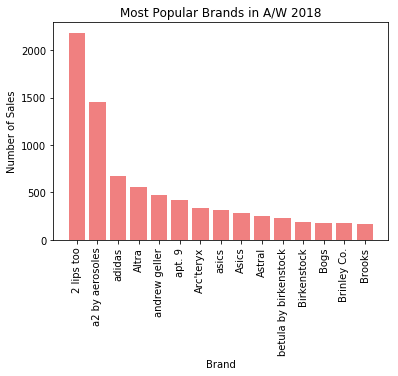

In [189]:

plt.bar(typebybrand[:15], brandcount[:15], label = "Most Popular Brands",
        color = "lightcoral")
plt.title("Most Popular Brands in A/W 2018")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of Sales")
plt.savefig('popularbrands.png')
plt.show()



In [191]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=typebybrand,
            y=brandcount))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)
fig.save("brandslider.svg")

fig.show()

AttributeError: 'Figure' object has no attribute 'savefig'

In [46]:
pricesbybrand = shoes_df.groupby("Brand")["Prices"].mean()
pricesbybrand

brands = shoes_df["Brand"].unique()

In [15]:
avgprices = shoes_df["Prices"].value_counts()
avgprices

brands = shoes_df["Brand"].value_counts()
brands

59.99     2279
69.99     1499
49.99      843
64.99      737
54.99      689
89.99      532
79.99      480
84.99      300
89.00      297
65.00      263
74.99      204
70.00      190
80.00      140
75.00      109
85.00      109
29.99      107
90.00       86
79.00       70
119.00      63
95.00       60
39.99       57
69.00       55
60.00       55
129.95      53
94.99       50
119.95      46
99.99       40
44.99       34
99.95       29
50.00       24
          ... 
14.00        1
35.00        1
179.95       1
160.00       1
48.99        1
57.00        1
34.95        1
168.95       1
42.92        1
16.97        1
128.95       1
289.95       1
26.99        1
29.75        1
42.99        1
47.00        1
45.99        1
37.41        1
151.24       1
46.74        1
15.88        1
36.99        1
35.25        1
145.95       1
25.00        1
8.97         1
24.75        1
25.76        1
34.99        1
32.98        1
Name: Prices, Length: 134, dtype: int64

In [16]:
colors = shoes_df["Color"].unique()
colors

totalcolors = shoes_df["Color"].value_counts()
totalcolors

Black          2871
Gray           1775
Tan            1300
Dark Blue       997
Brown           919
White           545
Light Blue      302
Pink            297
Dark Red        224
Red             211
Dark Green      154
Gold            151
Print           127
Purple           64
Orange           46
Light Green       9
Yellow            5
Cream             3
Name: Color, dtype: int64

In [18]:
typebycolor_df = shoes_df.groupby("Color")["Type"].unique()
typebycolor_df

Color
Black          [Heels, Booties, Sandals, Flats, Boots, Ballet...
Brown          [Heels, Sandals, Booties, Boots, Flats, Ballet...
Cream                                      [Flats, Ballet Flats]
Dark Blue      [Heels, Sandals, Flats, Ballet Flats, Sneakers...
Dark Green     [Booties, Sneakers, Heels, Ballet Flats, Flats...
Dark Red       [Ballet Flats, Sandals, Heels, Booties, Flats,...
Gold           [Heels, Ballet Flats, Sandals, Sneakers, Flats...
Gray           [Heels, Booties, Sandals, Flats, Boots, Sneake...
Light Blue     [Heels, Sandals, Athletic Shoes, Flats, Sneake...
Light Green              [Flats, Sandals, Heels, Athletic Shoes]
Orange                   [Flats, Sandals, Athletic Shoes, Heels]
Pink           [Heels, Sandals, Athletic Shoes, Ballet Flats,...
Print          [Heels, Flats, Sandals, Ballet Flats, Athletic...
Purple                  [Athletic Shoes, Sneakers, Heels, Flats]
Red            [Booties, Heels, Athletic Shoes, Flats, Sandal...
Tan            [Boo

In [25]:
shoes_df.head(8)

,Date,Brand,Type,Prices,Color,Currency,Merchant
0,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
1,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
2,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
3,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
4,2/11/18,2 lips too,Heels,64.95,White,USD,kohls
5,2/11/18,2 lips too,Heels,64.95,Black,USD,kohls
6,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
7,2/11/18,2 lips too,Heels,64.95,White,USD,kohls


In [40]:
shoes_groupby = shoes_df.groupby("Type")
avgpricesbytype = shoes_groupby.Prices.mean()
avgpricesbytype = avgpricesbytype.tolist()

shoetype = shoes_groupby.Type.first()
# shoetype
shoetype = shoetype.tolist()
avgpricesbytype

[79.37862745098097,
 60.73436893203889,
 80.88494265428825,
 88.55657142857169,
 60.77885596140609,
 63.413144023756445,
 60.47570149253701,
 69.9045686274513]

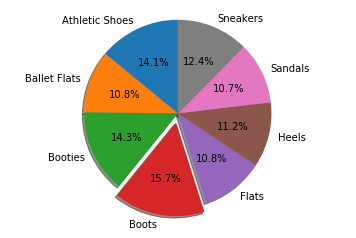

<Figure size 432x288 with 0 Axes>

In [41]:
explode = (0, 0, 0, 0.1, 0, 0, 0, 0)
plt.pie(x=avgpricesbytype, labels=shoetype, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.figure()
plt.show()

In [42]:
import plotly.graph_objects as go

labels = shoetype
values = avgpricesbytype

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

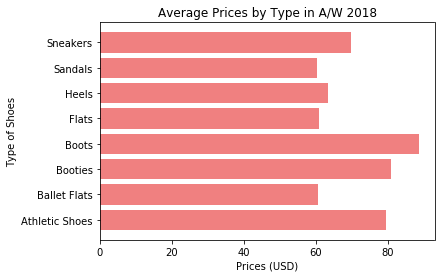

In [43]:
plt.barh(shoetype, avgpricesbytype, label = "Average Prices by Type",
        color = "lightcoral")
plt.title("Average Prices by Type in A/W 2018")
#plt.xticks(rotation=45)
plt.xlabel("Prices (USD)")
plt.ylabel("Type of Shoes")
plt.savefig('pricesbytype.png')
plt.show()

In [ ]:
date_df = shoes_df["Date"].unique()
date_df

In [ ]:
typecount_df = shoes_df.groupby("Type")["Date"].unique()
typecount_df

In [ ]:
plt.scatter(shoes_df["Color"], shoes_df["Type"], label = "Shoes",
                    color = "coral", edgecolors = "black", alpha = 0.5) 
plt.xticks(rotation=45)
plt.show()

In [ ]:
merchantname_df = shoes_df["Merchant"].unique()
merchantname_df

In [ ]:
pricesbymerchant_df = shoes_df.groupby("Merchant")["Prices"].sum()
pricesbymerchant_df

In [ ]:
totalmerchant_df = shoes_df.groupby("Merchant")["Date"].count()
totalmerchant_df

In [57]:
merchantcount = shoes_df["Merchant"].value_counts()
merchantcount

merchants = shoes_df["Merchant"].unique()
merchants

array(['kohls', 'backcountry', 'walmart', 'overstock', 'evo.com'],
      dtype=object)

In [62]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=merchants,
                   y=merchantcount))
fig.show()

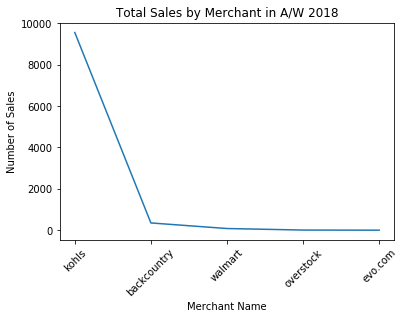

In [61]:
plt.plot(merchants, merchantcount, label = "Sales by Merchant")
plt.title("Total Sales by Merchant in A/W 2018")
plt.xticks(rotation=45)
plt.xlabel("Merchant Name")
plt.ylabel("Number of Sales")
plt.savefig('salesbymerchant.png')
plt.show()

In [ ]:
sns.violinplot(merchants_df, merchantcount_df, color="red", scale="count",)


In [ ]:
shoecount_df = shoes_df["Type"].value_counts()
shoecount_df

shoetypes_df = shoes_df["Type"].unique()
shoetypes_df

In [ ]:
plt.bar(shoetypes_df, shoecount_df, label = "Total Sales by Type", color = "lightcoral")
plt.title("Total Sales by Type in A/W 2018")
plt.xticks(rotation=45)
plt.xlabel("Type of Shoes")
plt.ylabel("Number of Pairs Sold")
plt.savefig('salesbytype.png')
plt.show()

In [ ]:
colorcount_df = shoes_df["Color"].value_counts()
colorcount_df

In [ ]:
#plt.bar(colorcount_df, shoecount_df, label = "Colors", color = "coral") 
#plt.xticks(rotation=45)
#plt.show()

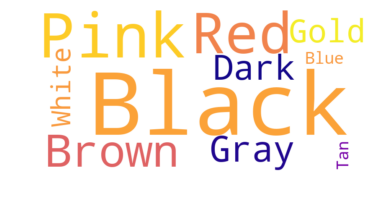

In [63]:
text = (shoes_df.Color.astype('str'))
stopwords = set(STOPWORDS)
stopwords.update(["Length", "dtype", "object", "Name", "Color"])
color_cloud = WordCloud(background_color='white', width = 800, height = 400, max_words = 50, colormap='plasma', stopwords=stopwords, random_state=1).generate(str(text))
plt.figure()
plt.axis('off')
plt.imshow(color_cloud, interpolation='bilinear')
plt.savefig('colorcloud.png')


In [64]:
spring19_df = spring19_df.drop(columns=["id",
                                  "dateAdded",
                                  "dateUpdated",
                                  "asins",
                                  "dimension",
                                  "ean / upc",
                                  "imageURLs",
                                  "keys",
                                  "manufacturerNumber",
                                  "prices.availability",
                                  "prices.condition",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "prices.offer",
                                  "prices.returnPolicy",
                                        "sizes",
                                        "prices.shipping",
                                        "prices.merchant",
                                        "manufacturer",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                        "prices.amountMin",
                                        "prices.size",
                                        "prices.color",
                                        "sourceURLs"
                         ])
#spring19_df.head()

In [65]:
#spring19_df.info()

In [87]:
spring19_df = spring19_df.rename(columns={#"prices.merchant": "Merchant",
                                    "brand": "Brand",
                                    "colors" : "Color",
                                    "prices.currency": "Currency",
                                    "prices.amountMax": "Prices"
                                   })
spring19_df.head()

,Date,Brand,Color,Type,name,Prices,Currency,Merchant
0,5/1/19,City Classified,Black,Booties,City Classified Stylish-S Women's Zipper Ankle...,29.95,USD,Walmart
1,5/1/19,Skechers,Taupe,Athletic Shoes,"Skechers Women'S You Radiate, Walking",84.00,USD,Walmart
2,5/1/19,Floral,Black,Heels,FLORAL Pearl Women's Wide Width Evening Dress ...,49.95,USD,Walmart
3,5/1/19,Jambu,Black,Booties,Women's Jambu Amal Water Resistant Bootie,127.20,USD,Walmart
4,5/1/19,Trotters,White,Boots,"trotters women's blast iii boot,black quill,11...",47.66,USD,Walmart


In [88]:
typebybrand19_df = spring19_df.groupby("Brand")["Type"].value_counts()
typebybrand19_df


Brand               Type          
1.STATE             Sandals            2
911Costume          Boots              1
A2 by Aerosoles     Ballet Flats      33
                    Sandals            7
                    Flats              4
                    Booties            3
                    Heels              1
A35                 Boots              2
AARON               Boots              1
AERUSI              Flats              1
ARRAY               Sandals           10
                    Flats              8
                    Heels              2
                    Booties            1
AXNY                Boots              5
Academie Gear       Flats              1
Adidas              Flats             18
                    Heels              2
                    Sandals            2
                    Booties            1
Adriana             Booties            2
Aerosoft            Sandals            4
                    Athletic Shoes     1
Aerosoles           Bo

In [89]:
pricesbybrand19_df = spring19_df.groupby("Brand")["Prices"].mean()
pricesbybrand19_df

Brand
1.STATE                20.005000
911Costume             59.880000
A2 by Aerosoles        40.142708
A35                    72.795000
AARON                 229.980000
AERUSI                 25.000000
ARRAY                  45.470000
AXNY                   48.960000
Academie Gear          48.310000
Adidas                 61.459130
Adriana                33.950000
Aerosoft               30.308000
Aerosoles              94.265738
Ahnu                   67.314000
Aldo                   63.950000
Alegria               105.336667
Alfani                 46.821622
Alotta Knits            9.950000
American Rag           37.557500
Ann Creek              67.996000
Anne Michelle          30.000000
Annie                  26.867500
Answer 2              123.228750
Anthony Wang           29.000000
Apex                  144.950000
Aqua Design            19.950000
Aquapillar             39.200370
Aquatalia             149.990000
Aravon                 47.990000
Ariat                  13.330000
    

In [135]:
typebycolor19_df = spring19_df.groupby("Color")["Type"].value_counts()
print(type(typebycolor19_df))
typebycolor19_df

<class 'pandas.core.series.Series'>


Color      Type          
Black      Flats             1276
           Boots             1246
           Sandals           1005
           Booties            798
           Heels              730
           Sneakers           116
           Athletic Shoes     111
           Ballet Flats        35
           Boat Shoes          11
Blue       Boots              828
           Flats              770
           Heels              727
           Booties            679
           Sandals            597
           Athletic Shoes     444
           Sneakers           297
           Ballet Flats       107
           Boat Shoes           7
Brown      Heels               73
           Sandals             23
           Booties             21
           Flats               11
           Boots                5
           Sneakers             1
Cream      Heels                3
           Boots                1
Dark Blue  Sneakers             2
           Boots                1
Gold       Sandals    

In [145]:
type19_df = pd.DataFrame(typebycolor19_df)
type19_df.columns = ['Count']
#df.index.names = ['Color', 'Shoe_Type']
type19_df.reset_index(inplace=True)
type19_df.head()

,Color,Type,Count
0,Black,Flats,1276
1,Black,Boots,1246
2,Black,Sandals,1005
3,Black,Booties,798
4,Black,Heels,730


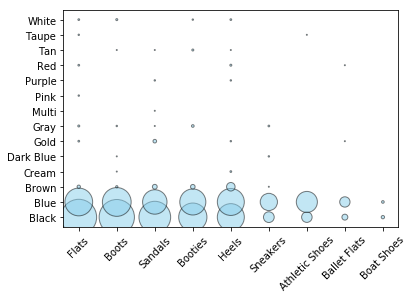

In [166]:
plt.scatter(type19_df["Type"], type19_df["Color"], type19_df["Count"], label = "Shoes",
                    color = "skyblue", edgecolors = "black", alpha = 0.5) 
plt.xticks(rotation=45)
plt.show()

In [170]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=type19_df["Color"],
                   y=type19_df["Count"]))
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in typebycolor19_df.groupby(['ticker']):
    ax.plot(grp['Date'], grp['adj_close'], label=key)

ax.legend()
plt.show()

In [91]:
avgpricesbytype19_df = spring19_df.groupby("Type")["Prices"].mean()
avgpricesbytype19_df

Type
Athletic Shoes    104.423435
Ballet Flats       39.226250
Boat Shoes         90.793333
Booties            73.281350
Boots              78.227232
Flats              73.227358
Heels              59.701068
Sandals            64.084960
Sneakers           79.166086
Name: Prices, dtype: float64

In [114]:
typecount19 = spring19_df["Type"].value_counts()
typecount19

#types19 = spring19_df["Type"].unique()
#types19

Boots             2088
Flats             2074
Sandals           1643
Heels             1545
Booties           1511
Athletic Shoes     556
Sneakers           419
Ballet Flats       144
Boat Shoes          18
Name: Type, dtype: int64

In [140]:
spring19_df.head()

,Date,Brand,Color,Type,name,Prices,Currency,Merchant
0,5/1/19,City Classified,Black,Booties,City Classified Stylish-S Women's Zipper Ankle...,29.95,USD,Walmart
1,5/1/19,Skechers,Taupe,Athletic Shoes,"Skechers Women'S You Radiate, Walking",84.00,USD,Walmart
2,5/1/19,Floral,Black,Heels,FLORAL Pearl Women's Wide Width Evening Dress ...,49.95,USD,Walmart
3,5/1/19,Jambu,Black,Booties,Women's Jambu Amal Water Resistant Bootie,127.20,USD,Walmart
4,5/1/19,Trotters,White,Boots,"trotters women's blast iii boot,black quill,11...",47.66,USD,Walmart


In [142]:
types_groupby = spring19_df.groupby("Type")
type19 = types_groupby.Type.first()
type19 = type19.tolist()

types_count19 = types_groupby.Type.value_counts()
types_count19 = types_count19.tolist()
types_count19

[556, 144, 18, 1511, 2088, 2074, 1545, 1643, 419]

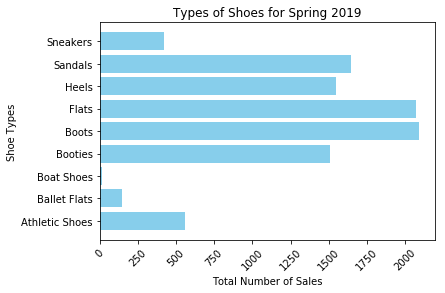

In [143]:
plt.barh(type19, types_count19, label = "Types19",
        color = "skyblue")
plt.title("Types of Shoes for Spring 2019")
plt.xticks(rotation=45)
plt.ylabel("Shoe Types")
plt.xlabel("Total Number of Sales")
plt.savefig('types19.png')
plt.show()

In [93]:
merchantname19_df = spring19_df["Merchant"].unique()
merchantname19_df

array(['Walmart', 'Shoes.com', 'Barcodable', 'Overstock'], dtype=object)

In [73]:
pricesbymerchant19_df = spring19_df.groupby("Merchant")["Prices"].sum()
pricesbymerchant19_df

Merchant
Barcodable       149.22
Overstock         95.99
Shoes.com       1127.64
Walmart       720609.89
Name: Prices, dtype: float64

In [78]:
totalmerchant19 = spring19_df["Merchant"].value_counts()
totalmerchant19

merchants19 = spring19_df["Merchant"].unique()

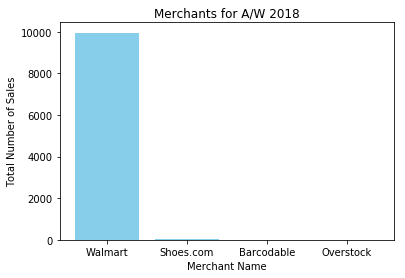

In [84]:
plt.bar(merchants19, totalmerchant19, label = "Merchants",
        color = "skyblue")
plt.title("Merchants for A/W 2018")
plt.xlabel("Merchant Name")
plt.ylabel("Total Number of Sales")
plt.savefig('merchants19.png')
plt.show()